## **Bank Customer Churn Analysis & Prediction**

**Goal:** Analyze the data, understand the factors that contribute to customer churn at the bank, and develop a predictive model to forecast whether a customer is likely to leave the bank.

### **Data Loading and Initial Exploration**

In [1]:
import pandas as pd

# Load the dataset
file_path = 'bank.csv'
data = pd.read_csv(file_path)

# Initial data exploration
data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### **Data Cleaning and Preprocessing**

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Dropping irrelevant columns
data_cleaned = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Encoding categorical variables
label_encoders = {column: LabelEncoder() for column in ['Geography', 'Gender']}
for column in label_encoders:
    data_cleaned[column] = label_encoders[column].fit_transform(data_cleaned[column])

# Normalizing numerical variables
scaler = StandardScaler()
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

# Splitting the dataset
X = data_cleaned.drop('Exited', axis=1)
y = data_cleaned['Exited']

## **Handling Class Imbalance with SMOTE**

In [3]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)


## **Model Training with Hyperparameter Tuning and Cross-Validation**

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_smote, y_smote)
best_rf_model = grid_search.best_estimator_

# Cross-validation
cv_scores = cross_val_score(best_rf_model, X_smote, y_smote, cv=5)

### **Feature Engineering**

In [5]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_smote_poly = poly.fit_transform(X_smote)

### **Final Model Evaluation**

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluating the model on the original test set
y_pred = best_rf_model.predict(X)
metrics = {
    'Accuracy': accuracy_score(y, y_pred),
    'Precision': precision_score(y, y_pred),
    'Recall': recall_score(y, y_pred),
    'F1 Score': f1_score(y, y_pred)
}

In [7]:
metrics

{'Accuracy': 0.9806,
 'Precision': 0.9221255153458543,
 'Recall': 0.9882179675994109,
 'F1 Score': 0.9540284360189574}

### **Model Explainability with SHAP**

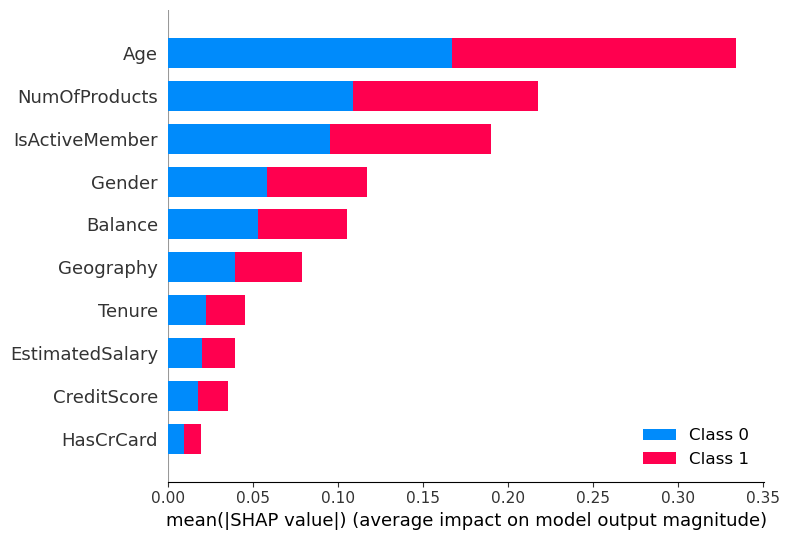

In [9]:
import shap

# SHAP values
shap_explainer = shap.TreeExplainer(best_rf_model)
shap_values = shap_explainer.shap_values(X)

# SHAP summary plot
shap.summary_plot(shap_values, X)

### **Saving the Model**

In [10]:
import joblib

# Saving the model
joblib.dump(best_rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']